# Carico le ricette

In [83]:
import pickle

with open('tasty_ingredients.pkl', 'rb') as handle:
    tasty_ingredients = pickle.load(handle)

with open('giallo_ingredients.pkl', 'rb') as handle:
    giallo_ingredients = pickle.load(handle)  
    
with open('giallo_ingredients_ita.pkl', 'rb') as handle:
    giallo_ingredients_ita = pickle.load(handle)  
    
giallo_ingredients_ita = [[ing.lower() for ing in recipe] for recipe in giallo_ingredients_ita]
giallo_ingredients.extend(giallo_ingredients_ita)

## Parole univoche

In [84]:
import re
regex = re.compile('[^a-zA-Z ]')
words = set()

for recipe in tasty_ingredients + giallo_ingredients:
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        ingredient_words = ingredient.split()
        for w in ingredient_words:
            words.add(w.lower())

print(f"Abbiamo {len(words)} parole univoche")
#print(words)     

Abbiamo 2283 parole univoche


# Lista di ingredienti trovata online

In [85]:
import json
import numpy as np

with open('ingredients.json', 'rb') as handle:
    ingredients_list = json.load(handle)  
    
ingredients_list = [ingredient["name"].lower() for ingredient in ingredients_list["tags"] if len(ingredient["name"].lower()) > 2]

ingredients_list = np.array(ingredients_list)
len(ingredients_list)

9932

# Sociomatrice

In [86]:
ingredients_dictionary = {
    "salt": ["salt"],
    "sugar": ["sugar"],
    "water": ["water", "ice"],
    "cereals": ["cereal", "cereals", "oat", "barley", "malt", "flakes","quinoa"], # cereali 
    "oil": ["oil"],
    "flour": ["flour", "starch"], #farina-amido
    "fruits": ["apple", "apples", "grape", "orange", "oranges", "strawberry", "strawberries",
               "raspberry", "pineapple", "cranberry", "cherry", "cherries", "banana", "bananas",
               "mango", "mangos", "cucumber", "peach", "peaches", "kiwi", "kiwis", "berries",
               "plum", "plums", "melon", "cider", "lemon", "lemons","figs","pear","limes","lime","pomegranate"],
    "milk": ["milk","wholemilk"],
    "nuts": ["seed", "seeds", "nut", "nuts", "almond", "almonds", "peanut", "peanuts", "sesame",
              "hazelnut","pistachio"],
    "onion": ["onion"],
    "garlic": ["garlic"],
    "cocoa": ["cocoa", "chocolate", "dark-chocolate"],
    "yeast": ["yeast", "sourdough"], # lievito
    "egg": ["egg", "eggs","yolk","yolks"],
    "vinegar": ["vinegar"], #aceto
    "tomato": ["tomato", "passato", "passata","datterino","datterini"],
    "cream": ["cream"],
    "rice": ["rice", "rices","basmati","carnaroli"],
    "corn": ["corn"],
    "cheese": ["cheese", "cheddar", "mozzarella", "parmisan", "parmigiano", "grana", "pecorino",
               "gorgonzola", "taleggio", "caciotta", "ricotta", "provola", "provolone",
               "mascarpone", "montasio", "piave", "asiago", "puzzone", "quartirolo",
               "scamorza", "stracchino","robiola","roquefort","queso"],
    "butter": ["butter"],
    "pork": ["pork", "ham", "bacon", "salami","ribs","sausage","mortadella","wurstel","bratwurst"], # maiale
    "beef": ["ribeye", "beef", "veal","roast-beef","bresaola","ossibuchi","chunk","beefsteak"],
    "white meat": ["chicken", "chickens" "bun", "turquey", "fowl","quail","pigeon"], # manzo
    "potato": ["potato", "potatos"],
    "honey": ["honey"],
    "paprika": ["paprika"],
    "mustard": ["mustard"],
    "turmeric": ["turmeric"], # curcuma
    "ginger": ["ginger"],
    "parsley": ["parsley"],
    "cinnamon": ["cinnamon"],
    "wine": ["wine","prosecco","moscato","pinot"],
    "beer": ["beer"],
    "alchool": ["sake","limoncello","marsala","rum","rhum","porto","brandy","whiskey","whisky","grappa","bourbon","liqueur"],
    "chili": ["chili", "jalapeno"],
    "mushrooms": ["mushroom", "mushrooms","mushroomsoaking","porcini"],
    "bread": ["bread","breadcrumbs","breadcrumb"],
    "pasta": ["pasta","tagliatelle","lasagne","farfalle","rigatoni","paccheri","strozzapreti","macaroni","linguine","spaghetti","maniche",
              "pappardelle","tortellini","ravioli","gnocchi"],
    "fish": ["fish", "salmon", "swordfish", "cod", "codfish", "sardines", "tuna", "trout", "trouts",
             "mackerel", "mackerels", "herring", "herrings", "hailbut", "halibuts","anchovies"],
    "seafood": ["seafood", "lobsters", "mussels", "crab", "crabs", "shrimp", "crayfish",
                "prawn", "clams","oyster","scampi", "squid", "squids", "octopus"],
    "veggies": ["spinach", "fennel", "carrot", "carrots", "celery", "celeries", "peppers",
                "cabbage", "kale", "chicory","zucchini","eggplant","eggplants" ],
    "legumes": ["chickpea", "chickpeas", "pea", "peas", "beans", "bean", "soy", "lentils"],
    "pepper": ["peppercorns", "pepper","pepperoncini","friggitelli"],
    "coffee": ["coffee","espresso","cappuccino"]
}

In [87]:
import numpy as np
regex = re.compile('[^a-zA-Z ]')
import itertools

ingredients_list = np.array(list(ingredients_dictionary.keys()))
n = len(ingredients_dictionary)
socio_giallo = np.zeros((n,n))
socio_tasty = np.zeros((n,n))

n_rec_giallo =len(giallo_ingredients)
n_rec_tasty = len(tasty_ingredients)

np.random.seed(0)

subsampled_indexes = np.random.choice(n_rec_tasty, size=n_rec_giallo, replace=True)
tasty_ingredients = [tasty_ingredients[i] for i in subsampled_indexes]

mean_ingr_per_recipe_giallo = 0
mean_ingr_per_recipe_tasty = 0

for recipe in tasty_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for key_food, psuedo_list in ingredients_dictionary.items():
            for w in psuedo_list:
                if w in ingredient:
                    ingredients_in_recipe.add(key_food)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_tasty[i, j] += 1
        socio_tasty[j, i] += 1
    mean_ingr_per_recipe_giallo += len(ingredients_in_recipe)
    
for recipe in giallo_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for key_food, psuedo_list in ingredients_dictionary.items():
            for w in psuedo_list:
                if w in ingredient:
                    ingredients_in_recipe.add(key_food)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_giallo[i, j] += 1
        socio_giallo[j, i] += 1
    mean_ingr_per_recipe_tasty += len(ingredients_in_recipe)


mean_ingr_per_recipe_giallo /= n_rec_giallo
mean_ingr_per_recipe_tasty  /= n_rec_giallo
# Le interazioni vengono contate 2 volte
socio_giallo /= 2
socio_tasty  /= 2

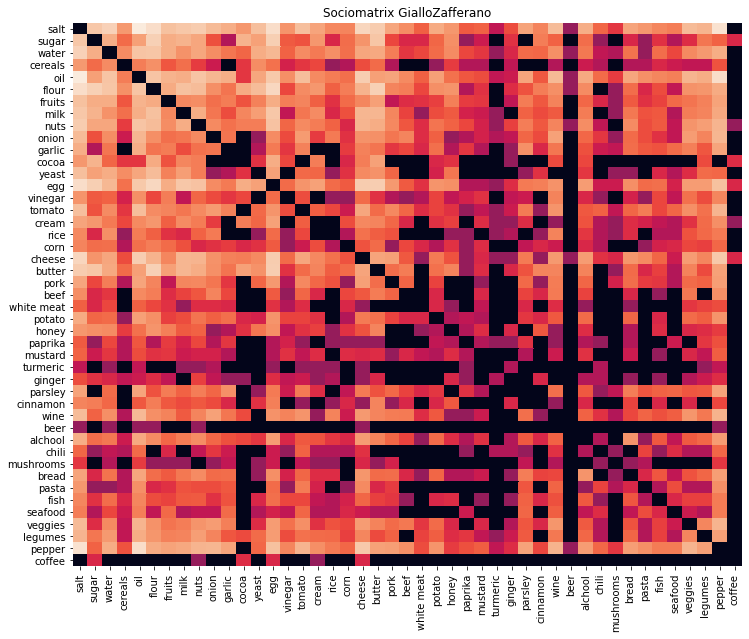

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.linestyle'] = "dashed"
import seaborn as sns

plt.figure(figsize=(12,10))

socio_giallo_df = pd.DataFrame(socio_giallo,
                               columns=ingredients_list, index=ingredients_list)

sns.heatmap(np.log(socio_giallo_df + 0.01), annot=False, cbar = False)
plt.title("Sociomatrix GialloZafferano")
plt.show()

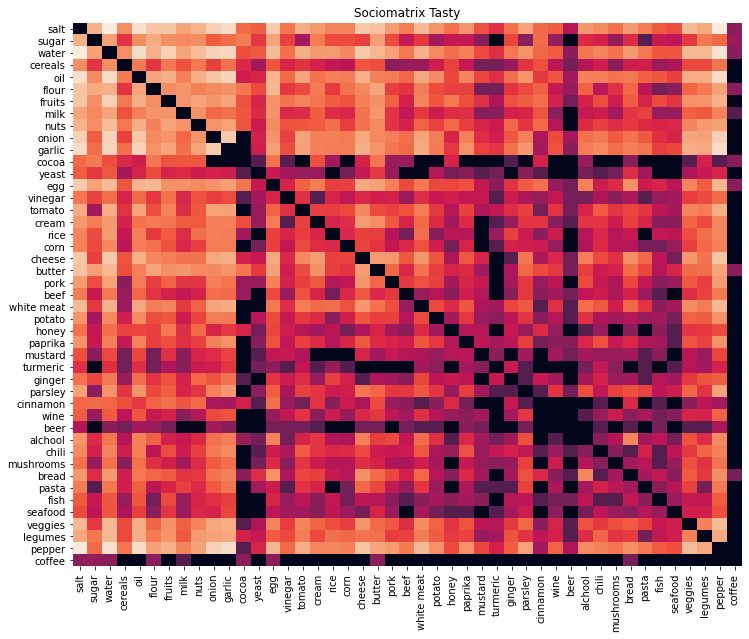

In [89]:
plt.figure(figsize=(12,10))

socio_tasty_df = pd.DataFrame(socio_tasty,
                               columns=ingredients_list, index=ingredients_list)

sns.heatmap(np.log(socio_tasty_df + 0.1), annot=False, cbar = False)
plt.title("Sociomatrix Tasty")
plt.show()

In [90]:
import networkx as nx

G_giallo = nx.from_numpy_array(socio_giallo)

n_recipes = len(giallo_ingredients)
n = socio_giallo.shape[0]

grand_mean = np.sum(socio_giallo)/(n * (n-1)) # no diagonal
connections_density = np.sum(socio_giallo!=0)/(n * (n-1)) # no diagonal

# Sono uguali perchè la matrice è simmetrica
row_mean = np.mean(socio_giallo_df, axis=1)
col_mean = np.mean(socio_giallo_df, axis=0)
degree = np.sum(socio_giallo_df!=0, axis=1)

diameter = nx.diameter(G_giallo)
max_degree = np.max(degree)
which_max_degree = ", ".join([str(ingredients_list[i][0]) for i in np.argwhere(np.array(degree) == max_degree)])

print("------------------------------------------------------------------------------------------")
print(f"""
      GIALLO SOCIOMATRIX:
      *** There are {n_recipes} recipes.
      *** There are {n} ingredients.
      *** There are {round(mean_ingr_per_recipe_giallo,2)} ingredients per recipe, in mean.
      *** Grand mean: {round(grand_mean,2)} interactions per couple of ingredients.
      *** Edge density: {round(connections_density*100,2)}%
      *** Diameter: {diameter}
      *** Max degree: {int(max_degree)} ({which_max_degree})
      """)
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------

      GIALLO SOCIOMATRIX:
      *** There are 1387 recipes.
      *** There are 45 ingredients.
      *** There are 7.41 ingredients per recipe, in mean.
      *** Grand mean: 17.81 interactions per couple of ingredients.
      *** Edge density: 77.78%
      *** Diameter: 2
      *** Max degree: 44 (cheese)
      
------------------------------------------------------------------------------------------


In [91]:
G_tasty = nx.from_numpy_array(socio_tasty)

n_recipes = len(tasty_ingredients)
n = socio_tasty.shape[0]

grand_mean = np.sum(socio_tasty)/(n * (n-1)) # no diagonal
connections_density = np.sum(socio_tasty!=0)/(n * (n-1)) # no diagonal

# Sono uguali perchè la matrice è simmetrica
row_mean = np.mean(socio_tasty_df, axis=1)
col_mean = np.mean(socio_tasty_df, axis=0)
degree = np.sum(socio_tasty_df!=0, axis=1)

diameter = nx.diameter(G_tasty)
max_degree = np.max(degree)
which_max_degree = ", ".join([str(ingredients_list[i][0]) for i in np.argwhere(np.array(degree) == max_degree)])

print("------------------------------------------------------------------------------------------")
print(f"""
      TASTY SOCIOMATRIX:
      *** There are {n_recipes} recipes.
      *** There are {n} ingredients.
      *** There are {round(mean_ingr_per_recipe_tasty,2)} ingredients per recipe, in mean.
      *** Grand mean: {round(grand_mean,2)} interactions per couple of ingredients.
      *** Edge density: {round(connections_density*100,2)}%
      *** Diameter: {diameter}
      *** Max degree: {int(max_degree)} ({which_max_degree})
      """)
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------

      TASTY SOCIOMATRIX:
      *** There are 1387 recipes.
      *** There are 45 ingredients.
      *** There are 7.09 ingredients per recipe, in mean.
      *** Grand mean: 20.43 interactions per couple of ingredients.
      *** Edge density: 89.9%
      *** Diameter: 2
      *** Max degree: 44 (salt, water, flour, egg)
      
------------------------------------------------------------------------------------------


# Numero di collegamenti per ingrediente

In [92]:
degree = pd.DataFrame({"Giallo": (socio_giallo_df!=0).sum(), "Tasty": (socio_tasty_df!=0).sum()})
degree.loc[(degree.Giallo + degree.Tasty).sort_values(ascending = False).index]

,Giallo,Tasty
salt,43,44
water,43,44
egg,43,44
cheese,44,42
oil,43,43
nuts,43,42
pepper,42,43
flour,41,44
fruits,41,43
milk,40,43


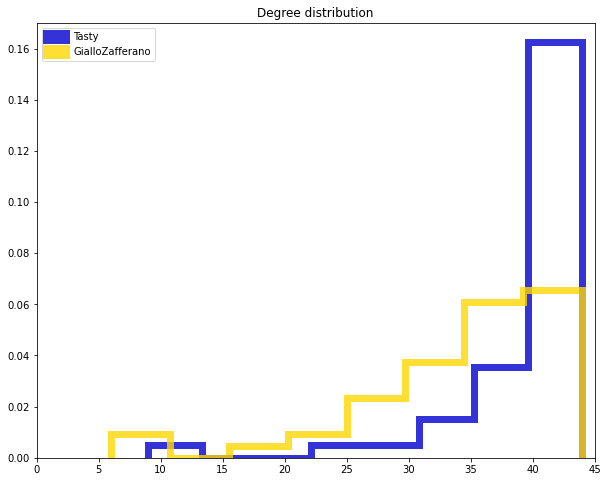

In [93]:
def compare_histograms(data_tasty, data_giallo, xrange = None, yrange = None, title = None, n_bins = 8, lw = 7, legend_loc = "upper left"):
        
        fig, ax = plt.subplots(1,1, figsize = (10,8))

        ax.hist(data_tasty, bins=n_bins, density = True, color = "mediumblue", linewidth = lw,
                edgecolor='mediumblue', alpha = 0.8, label = "Tasty", histtype='step')


        ax.hist(data_giallo, bins=n_bins, density = True, color = "gold", linewidth = lw,
                edgecolor='gold', alpha =0.8, label = "GialloZafferano", histtype='step')


        ax.grid(False)
        ax.set_xlim(xrange)
        ax.set_ylim(yrange)
        ax.set_title(title)

        ax.legend(loc = legend_loc)

        plt.show()

compare_histograms(degree.Tasty, degree.Giallo,
                   xrange = [0, 45], yrange = [0, 0.17],
                   title = "Degree distribution",
                   n_bins = 8, lw = 7)

In [94]:
from scipy import stats
stat, pval = stats.ttest_ind(degree.Tasty, degree.Giallo, equal_var=False)
print(pval)

0.001296280183064487


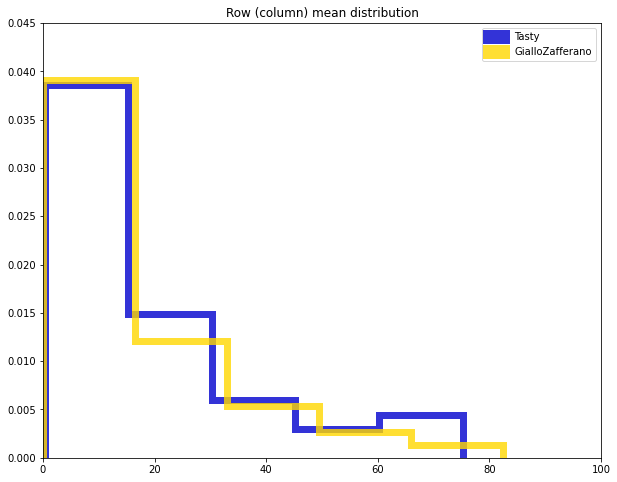

In [95]:
compare_histograms(np.mean(socio_tasty, axis=1), np.mean(socio_giallo, axis=1),
                   xrange = [0, 100], yrange = [0, 0.045],
                   title = "Row (column) mean distribution",
                   n_bins = 5, lw = 7, legend_loc = "upper right")

In [96]:
stat, pval = stats.ttest_ind(np.mean(socio_tasty, axis=1), np.mean(socio_giallo, axis=1), equal_var=False)
print(pval)

0.5095882089867878


## Differenze nella sociomatrice
Quali accoppiate in tasty e non in giallo?

In [97]:
tasty_exclusive_combos =  []
giallo_exclusive_combos = []
for i, ingr_i in enumerate(ingredients_list):
    for j, ingr_j in enumerate(ingredients_list):
        if i < j:
            if socio_tasty[i, j] != 0 and socio_giallo[i, j] == 0:
                tasty_exclusive_combos.append((ingr_i, ingr_j))
            if socio_tasty[i, j] == 0 and socio_giallo[i, j] != 0:
                giallo_exclusive_combos.append((ingr_i, ingr_j))
print(f"""
Tasty {len(tasty_exclusive_combos)} exlusive combinations:
{", ".join([i + " with " + j for i,j in tasty_exclusive_combos])} 


Giallo {len(giallo_exclusive_combos)} exlusive combinations:
{", ".join([i + " with " + j for i,j in giallo_exclusive_combos])}      
""")


Tasty 135 exlusive combinations:
salt with coffee, sugar with parsley, sugar with mushrooms, water with coffee, cereals with garlic, cereals with beef, cereals with white meat, cereals with turmeric, cereals with parsley, cereals with cinnamon, cereals with beer, cereals with mushrooms, flour with turmeric, flour with chili, flour with coffee, fruits with turmeric, fruits with beer, milk with ginger, milk with chili, milk with coffee, nuts with mushrooms, onion with beer, garlic with cream, garlic with rice, garlic with turmeric, garlic with beer, cocoa with rice, cocoa with pork, cocoa with beef, cocoa with cinnamon, cocoa with bread, cocoa with veggies, cocoa with pepper, yeast with vinegar, yeast with paprika, yeast with mustard, yeast with turmeric, yeast with chili, yeast with pasta, egg with beer, vinegar with cream, vinegar with turmeric, vinegar with cinnamon, vinegar with beer, vinegar with mushrooms, tomato with beer, cream with rice, cream with white meat, cream with paprik

## Alimenti con alta differenza di grado

In [98]:
degree_diff = pd.DataFrame({"Giallo": degree.Giallo,
                            "Tasty": degree.Tasty,
                            "Difference": np.abs(degree.Giallo - degree.Tasty)})
degree_diff.sort_values(by = "Difference" ,ascending = False).iloc[:10,:]

,Giallo,Tasty,Difference
beer,7,26,19
mushrooms,22,39,17
white meat,25,41,16
turmeric,16,31,15
chili,29,42,13
beef,28,40,12
paprika,31,42,11
ginger,29,40,11
cereals,35,43,8
parsley,34,42,8


In [99]:
degree_diff.loc[degree_diff.Giallo > degree_diff.Tasty,:]

,Giallo,Tasty,Difference
nuts,43,42,1
cheese,44,42,2
wine,39,38,1
